In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [14]:
# Define the paths to your image folders
train_path = 'C:\\Users\\HP\\Desktop\\ML Assignment\\GurNum'
val_path = 'C:\\Users\\HP\\Desktop\\ML Assignment\\GurNum'

In [15]:
# Set the path to the folder containing the 'train' folder
train_dir_path = train_path

# Set the image size
image_size = (32, 32)

# Create empty lists for the images and labels
image_list = []
label_list = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(train_dir_path, 'train', str(label))
    # Loop over each image in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img, image_size)
            # Append the image and label to the lists
            image_list.append(resized_img)
            label_list.append(label)

# Convert the lists to NumPy arrays
image_array = np.array(image_list)
label_array = np.array(label_list)

# Save the arrays in NumPy format
np.save('x_train.npy', image_array)
np.save('y_train.npy', label_array)

In [16]:
# Set the path to the folder containing the 'val' folder
val_dir_path = val_path

# Set the image size
image_size_val = (32, 32)

# Create empty lists for the images and labels
image_list_val = []
label_list_val = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(val_dir_path, 'val\\', str(label))
    # Loop over each image in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img, image_size_val)
            # Append the image and label to the lists
            image_list_val.append(resized_img)
            label_list_val.append(label)
            
# Convert the lists to NumPy arrays
image_array_val = np.array(image_list_val)
label_array_val = np.array(label_list_val)

# Save the arrays in NumPy format
np.save('x_test.npy', image_array_val)
np.save('y_test.npy', label_array_val)

In [17]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

Number of training images: 1000
Number of test images: 178
Shape of images: (32, 32)
Shape of training set: (1000, 32, 32)
Shape of test set: (178, 32, 32)


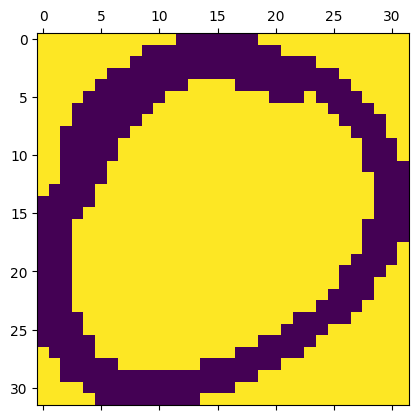

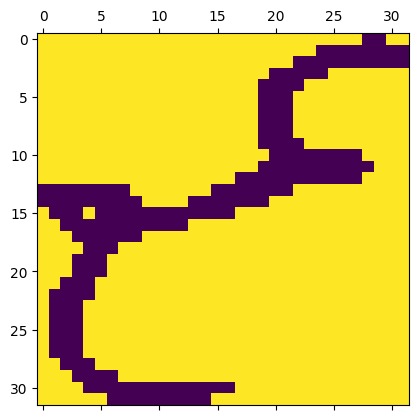

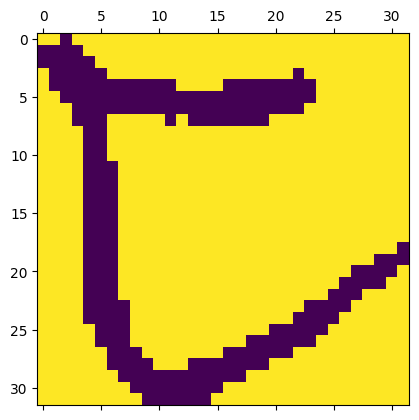

In [18]:
# Check the length of the training and test sets and the shape of the images
print("Number of training images:", len(x_train))
print("Number of test images:", len(x_test))
print("Shape of images:", x_train[0].shape)

# Display the first and the 1000th image of the training set
plt.matshow(x_train[0])
plt.matshow(x_train[999])

# Check the shapes of the training and test sets
print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

# Display a sample image from the test set
plt.matshow(x_test[150])

In [19]:
# Define a simple neural network with a single dense layer.
# The dense layer is fully connected, with 10 output nodes (one for each digit)
# and an input shape of 1024 (32x32 grayscale images flattened into a 1D array).
# The activation function used in the layer is the sigmoid function.
model = keras.Sequential([
 keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,), activation='sigmoid')
])

# Compile the neural network with the Adam optimizer and sparse categorical crossentropy loss function.
# Metrics used for evaluation are accuracy.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the neural network on the training data for 10 epochs with validation on the test data.
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 2s 17ms/step - loss: 121.6087 - accuracy: 0.4300 - val_loss: 57.5433 - val_accuracy: 0.5899
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 24.9631 - accuracy: 0.8100 - val_loss: 46.9227 - val_accuracy: 0.7079
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 13.0722 - accuracy: 0.8800 - val_loss: 19.8260 - val_accuracy: 0.7809
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 7.3410 - accuracy: 0.9090 - val_loss: 25.0534 - val_accuracy: 0.7753
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 6.1185 - accuracy: 0.9250 - val_loss: 12.0526 - val_accuracy: 0.8876
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1.8942 - accuracy: 0.9710 - val_loss: 11.8709 - val_accuracy: 0.9157
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 2.3918 - accuracy: 0.9680 - val_loss: 16.5931 - val_accuracy: 0.8315
Epoch 8/

In [20]:
# Observation : we see a better accuracy after the 1st iteration

In [22]:
# Scale the pixel values of the images by dividing them by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# Train the model on the scaled data for 10 epochs and validate on the test data
model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 16ms/step - loss: 0.7256 - accuracy: 0.9710 - val_loss: 0.9776 - val_accuracy: 0.8764
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7167 - accuracy: 0.9740 - val_loss: 0.9569 - val_accuracy: 0.8989
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.9830 - val_loss: 0.9407 - val_accuracy: 0.9045
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.9840 - val_loss: 0.9292 - val_accuracy: 0.8989
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.9860 - val_loss: 0.9188 - val_accuracy: 0.9101
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.9870 - val_loss: 0.9103 - val_accuracy: 0.9101
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.9900 - val_loss: 0.9027 - val_accuracy: 0.9101
Epoch 8/10
32/32 [=

In [23]:
# Observation : we are getting a better result for all iterations on scaling the training dataset

In [24]:
# evaluating the test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.8814 - accuracy: 0.9213


[0.8814331889152527, 0.9213483333587646]

In [26]:
# Observation : The result is almost same as the training dataset

6/6 [==============================] - 0s 4ms/step
Predicted values: [0.9417059  0.4596557  0.42386967 0.18649861 0.48405373 0.57913715
 0.11819613 0.62555534 0.73903066 0.4704655 ]
Predicted class: 0
Predicted class: 2
Predicted class: 6


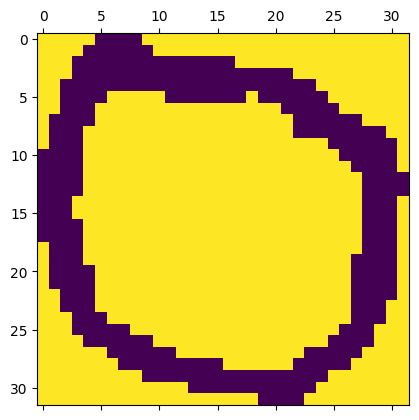

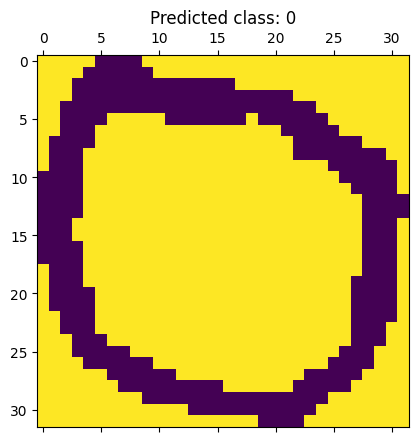

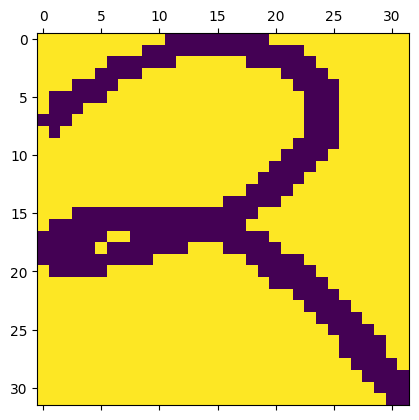

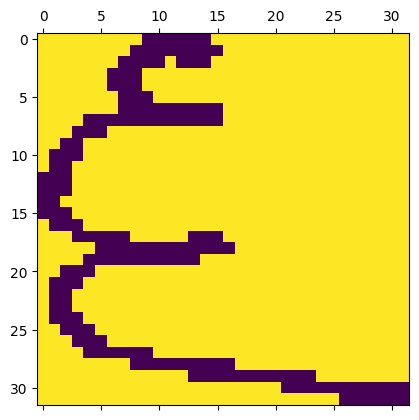

In [28]:
# Predict the first image in the test set
plt.matshow(x_test[0])

# Use the trained model to predict the output of the first image in the test set
y_predicted = model.predict(x_test_scaled)

# Print the predicted values for the first image
print('Predicted values:', y_predicted[0])

# The predicted values are in the form of probabilities for each class. 
# To get the class with the highest probability, we can use np.argmax function.
# This gives us the index of the highest probability, which corresponds to the predicted class.
predicted_class = np.argmax(y_predicted[0])
print('Predicted class:', predicted_class)

# Plot the image with the predicted class
plt.matshow(x_test[0])
plt.title('Predicted class: {}'.format(predicted_class))

# Test with some more images
plt.matshow(x_test[37])
predicted_class = np.argmax(y_predicted[37])
print('Predicted class:', predicted_class)

plt.matshow(x_test[121])
predicted_class = np.argmax(y_predicted[121])
print('Predicted class:', predicted_class)

In [29]:
# convert the predicted probabilities into predicted labels
y_predicted_labels=[np.argmax(i) for i in y_predicted]

# print the predicted labels and the length of the labels
print(y_predicted_labels, len(y_predicted_labels))

# create a confusion matrix using the predicted and actual labels
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# print the confusion matrix
print(conf_mat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 3, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 9, 9] 178
tf.Tensor(
[[18  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  3  0  0]
 [ 0  0 11  1  1  3  0  0  0  1]
 [ 0  0  0 16  0  1  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  1]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  2  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  1  0  0 19]], shape=(10, 10), dtype=int32)


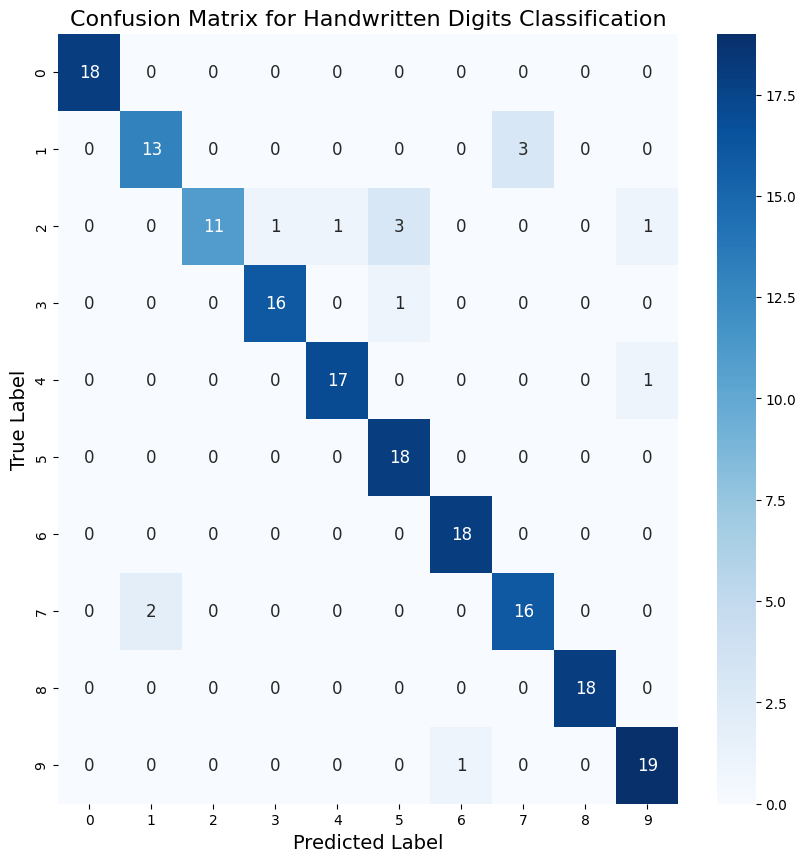

In [30]:
import seaborn as sn

# create heatmap with updated properties
plt.figure(figsize=(10, 10))
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for Handwritten Digits Classification', fontsize=16)

# display the plot
plt.show()

In [ ]:
# The confusion matrix shows that our model is making some errors. To improve its performance, 
# we'll modify our neural network by adding more layers and using a different activation function.

In [31]:
# In the first dense layer, the input is 32 x 32 = 1024 neurons, which will give 10 outputs (numbers from 0 to 9).
# In the second dense layer, the input is 10 neurons from the output of the first layer.
# We can add more layers for improved accuracy.

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the neural network
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10 epochs
history = model2.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test))


Epoch 1/10
32/32 [==============================] - 2s 34ms/step - loss: 1.4771 - accuracy: 0.6490 - val_loss: 0.4764 - val_accuracy: 0.8596
Epoch 2/10
32/32 [==============================] - 1s 27ms/step - loss: 0.1936 - accuracy: 0.9460 - val_loss: 0.2985 - val_accuracy: 0.9326
Epoch 3/10
32/32 [==============================] - 1s 26ms/step - loss: 0.1198 - accuracy: 0.9630 - val_loss: 0.2420 - val_accuracy: 0.9157
Epoch 4/10
32/32 [==============================] - 1s 31ms/step - loss: 0.0773 - accuracy: 0.9850 - val_loss: 0.2224 - val_accuracy: 0.9438
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0432 - accuracy: 0.9930 - val_loss: 0.2438 - val_accuracy: 0.9382
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0376 - accuracy: 0.9940 - val_loss: 0.2103 - val_accuracy: 0.9438
Epoch 7/10
32/32 [==============================] - 1s 26ms/step - loss: 0.0303 - accuracy: 0.9940 - val_loss: 0.2155 - val_accuracy: 0.9494
Epoch 8/10
32

In [32]:
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 8ms/step - loss: 0.1903 - accuracy: 0.9382


[0.19026972353458405, 0.9382022619247437]

In [33]:
# predict on test set
y_predicted = model2.predict(x_test_scaled)

# convert predicted values to labels
y_predicted_labels=[np.argmax(i) for i in y_predicted]

# print predicted labels and number of predicted labels
print(y_predicted_labels, len(y_predicted_labels))

# calculate confusion matrix
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# display confusion matrix
conf_mat


6/6 [==============================] - 0s 8ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  1, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

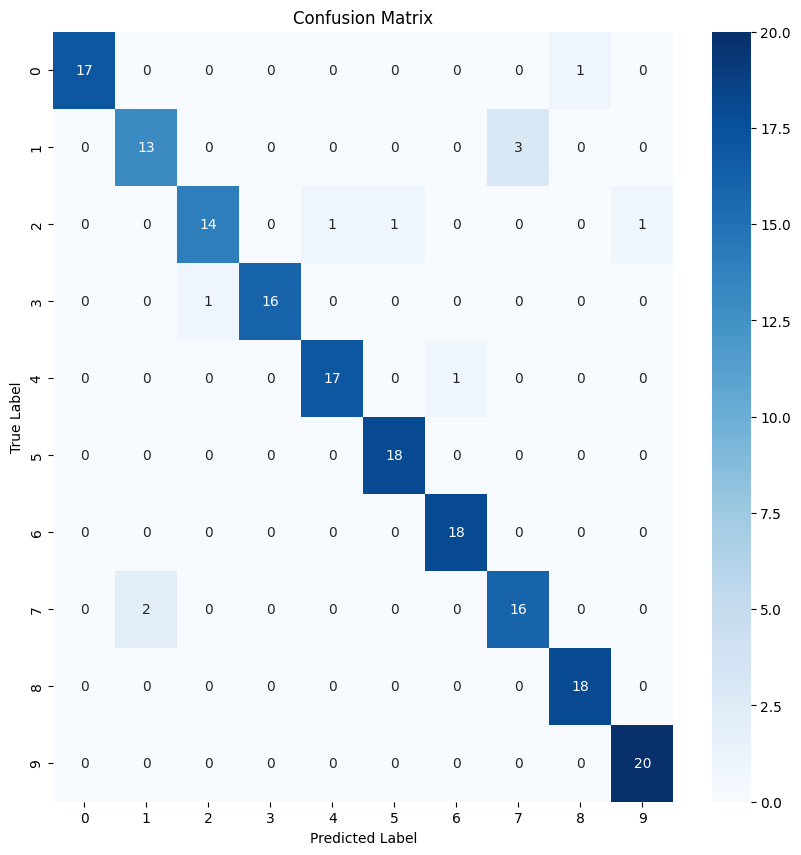

In [34]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Observatoin : Now in the updated model, there are less number of errors as we can see from the confusion matrix

6/6 [==============================] - 0s 5ms/step - loss: 13.5804 - accuracy: 0.9101
Test accuracy: 0.9101123809814453


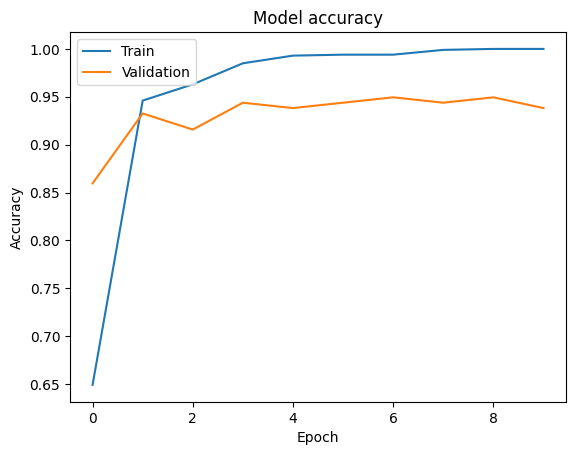

In [36]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()